<a href="https://colab.research.google.com/github/camilorey/material_clases/blob/main/generadorDatos_multinormales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as Pandas
import seaborn as SeaBorn
import matplotlib.pyplot as PyPlot

#para generar los números aleatorios
from scipy.stats import multivariate_normal
import numpy as NumPy

# Generación de Datos Multidimensionales

Aquí generamos datos multidimensionales distribuidos multinormal. 

In [ ]:
def generarMuestra(num_muestras,vector_medias,matriz_cov,nom_variables):
  #teniendo la matriz de covarianza podemos generar las muestras
  muestra = multivariate_normal.rvs(vector_medias,matriz_cov,num_muestras)
  tam_muestra = muestra.shape[0]
  dimension = muestra.shape[1]
  dataframe_muestras = Pandas.DataFrame(columns=nom_variables)
  #ahora a guardar en el DataFrame
  for i in range(len(muestra)):
    filaDict = {}
    for j in range(len(nom_variables)):
      filaDict[nom_variables[j]] = muestra[i][j]
    #guardamos las muestras en el DataFrame
    dataframe_muestras = dataframe_muestras.append(filaDict,ignore_index=True)
  return dataframe_muestras


# Algunas gráficas interesantes para entender cómo se comporta la Normal Multivariada y las muestras derivadas de ella

Veamos cómo queda tanto el vector de medias cómo la matriz de covarianza (original y descompuesta espectralmente). En Gráficos

In [ ]:
def graficas_parametrosMuestra(vec_medias,matriz_covar,nom_variables):
  #vamos a hacer la descomposición espectral de la matriz
  eigen_vals,eigen_vecs = NumPy.linalg.eig(matriz_covar)
  #ahora vamos a generar algunas gráficas para la matriz de covarianza 
  Figura,subFiguras = PyPlot.subplots(1,3,figsize=(15,4))
  Figura.suptitle(' Gráficas de la distribución del Dataset')
  subFiguras[0].set_title('Distribución de medias')
  subFiguras[1].set_title('Matriz de covarianza')
  subFiguras[2].set_title('Valores propios covarianza')

  subFiguras[0].bar(nom_variables,vec_medias,color='blue')
  SeaBorn.heatmap(eigen_vecs,cmap='coolwarm',annot=True,ax=subFiguras[1])
  subFiguras[2].bar(nom_variables,eigen_vals,color='red')
  PyPlot.show()


In [ ]:
#ahora vamos a pintar algunas cosas 
def plot_distribuciones(muestra):
  Figura = PyPlot.figure(figsize=(15,15))
  grafica_muestra = SeaBorn.pairplot(data=muestra,diag_kind='kde')
  PyPlot.show()

def graficas_descomposicionEspectral(muestra):
  covar = muestra.cov()
  #vamos a hacer la descomposición espectral de la matriz
  eigen_vals,eigen_vecs = NumPy.linalg.eig(covar)
  #ahora vamos a generar algunas gráficas para la matriz de covarianza 
  Figura,subFiguras = PyPlot.subplots(1,3,figsize=(15,4))
  Figura.suptitle(' Gráficas de la distribución del Dataset')
  subFiguras[0].set_title('Matriz de correlación')
  subFiguras[1].set_title('Matriz de descomposición')
  subFiguras[2].set_title('Gráfica de valores propios')
  SeaBorn.heatmap(muestra.corr(),cmap='viridis',annot=True,ax=subFiguras[0])
  SeaBorn.heatmap(eigen_vecs,cmap='coolwarm',annot=True,ax=subFiguras[1],xticklabels=muestra.columns)
  subFiguras[2]= PyPlot.bar(muestra.columns,eigen_vals,color='blue')
  PyPlot.show()

#Un ejemplo de generación de datos distribuidos Multi-normalmente

Generemos datos y usemos los elementos programados hasta el momento para evaluar las posibilidades.

Primero vamos a generar los parámetros para la distribución: el vector de medias $\mathbf{\mu}$ y la matriz de covarianzas $\Sigma$

In [ ]:
#vamos a generar una muestra en dimensión 3 para probar
dim = 9
media = NumPy.random.randn(dim)
M = NumPy.random.randn(dim,dim)
covarianza = NumPy.dot(M,M.T)


Ahora, podemos generar la muestra, poniéndole el nombre muy básico a las variables: **var**

In [ ]:
#vamos a darle nombre a nuestras variables
nom_vars =["var_"+str(i) for i in range(dim)]
#vamos a generar una matriz de covarianza por un método raro
muestra_1 = generarMuestra(500,media,covarianza,nom_vars)

Ahora, podemos graficar la distribución de los puntos en la muestra

<Figure size 1080x1080 with 0 Axes>

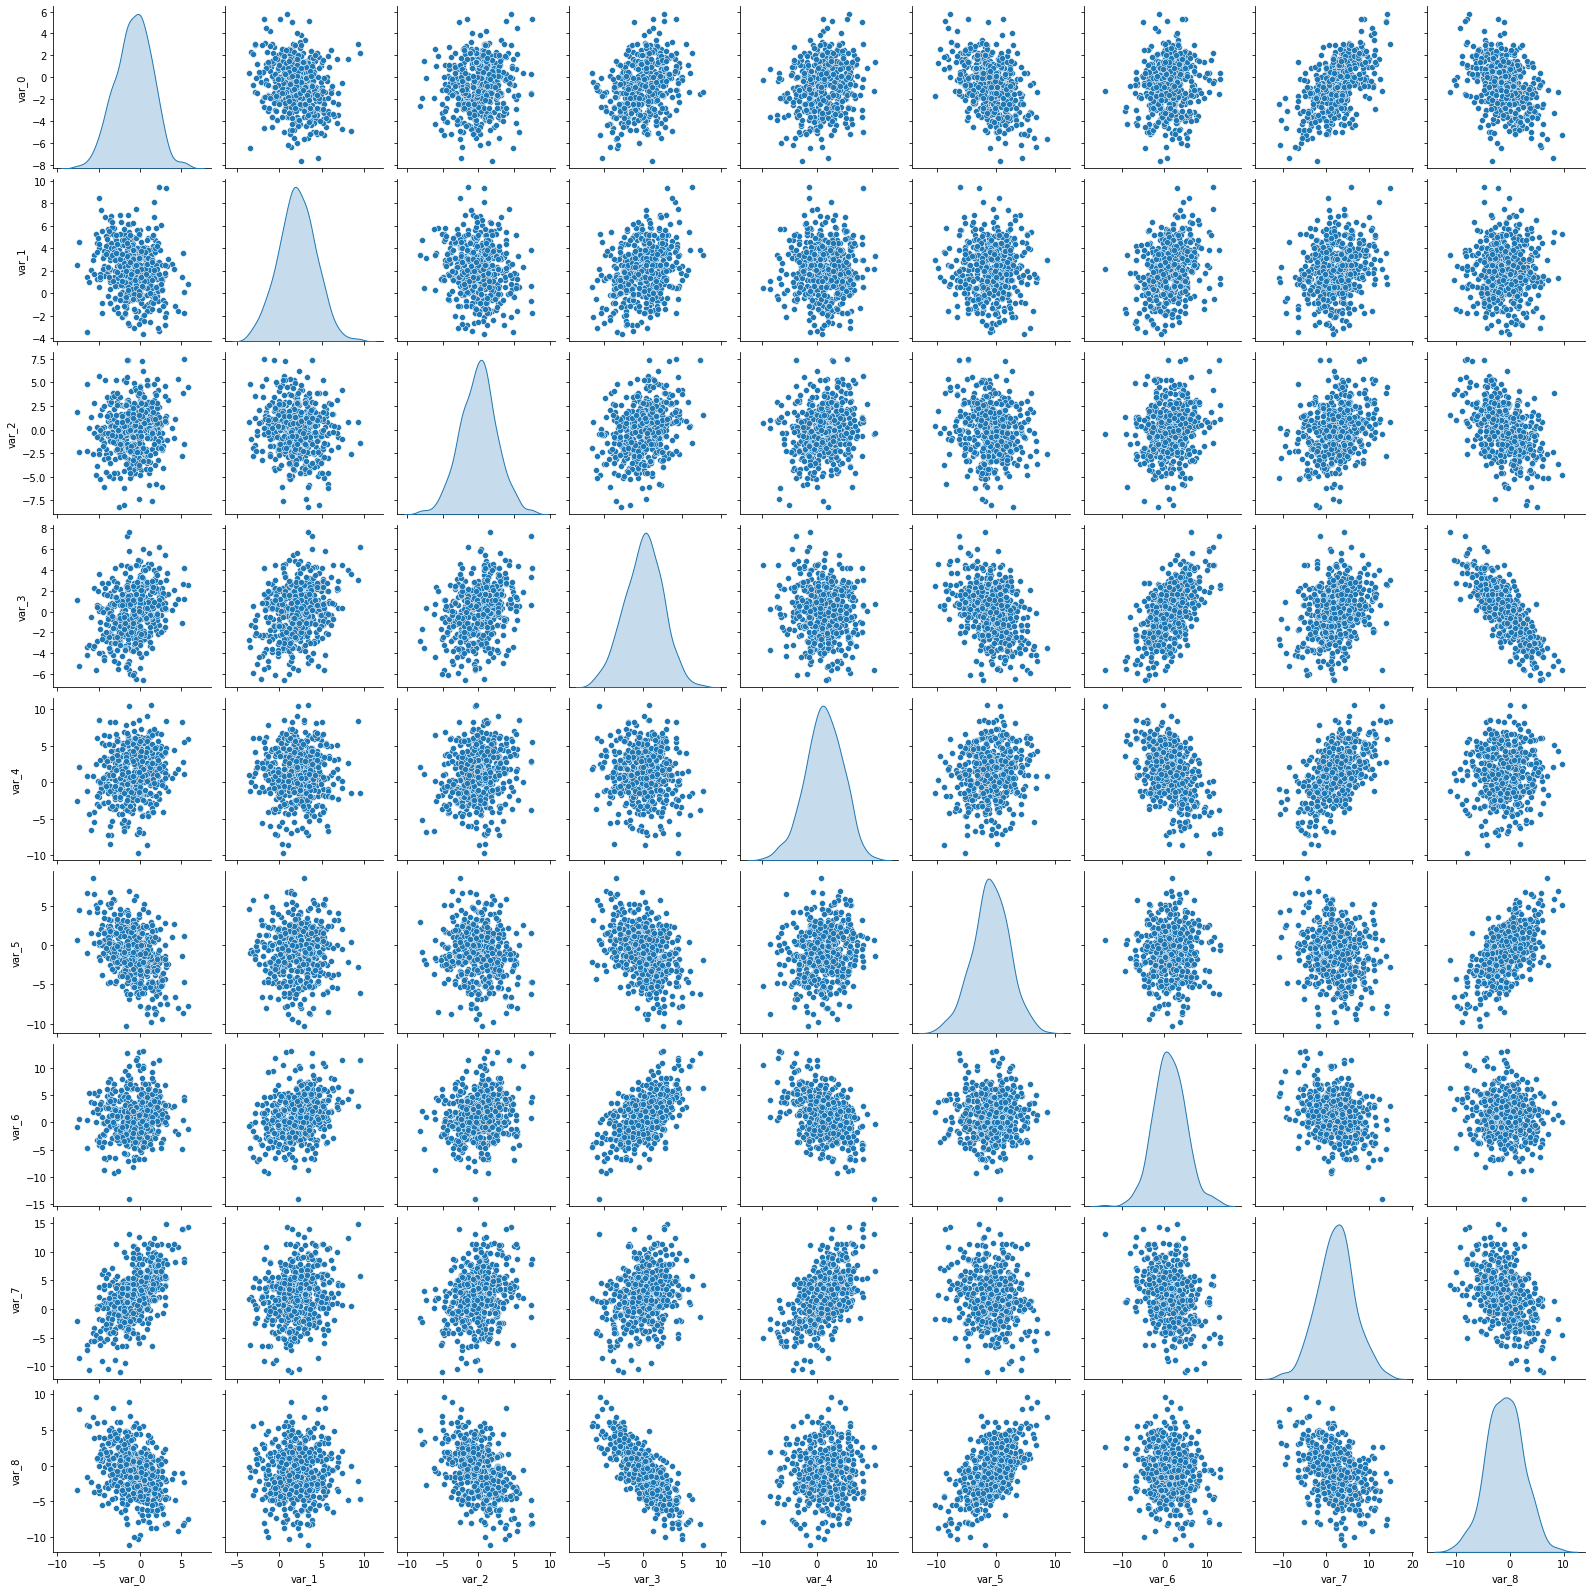

In [ ]:
plot_distribuciones(muestra_1)

Y podemos ver los gráficos de descomposición espectral para ver cual cual variable domina. 

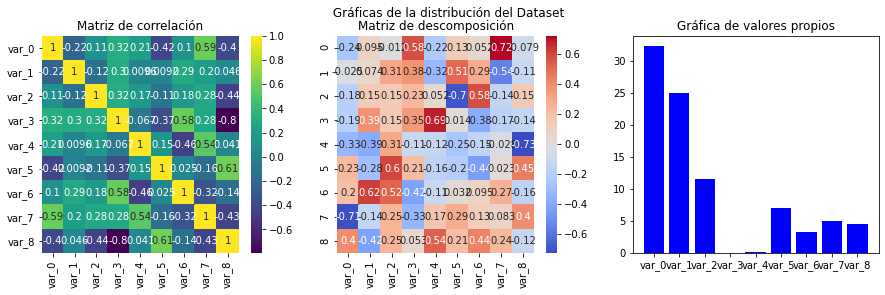

In [ ]:
graficas_descomposicionEspectral(muestra_1)


# Un poco de PCA para el alma

Con objeto de *simplificar* los datos, muchas veces es útil reducir su dimensión. Esto se puede hacer a través del algoritmo de PCA (Principal Component Analysis), que permite reducir la dimensionalidad de los datos a un número especifico de variables. 

Debemos primero estandarizar los datos para que el algoritmo de PCA funcione. 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Ahora, podemos generar un dataset estandarizado, solo sobre las variables numéricas (las categóricas debemos mantenerlas separadas). 

In [ ]:
vars_numericas=nom_vars
var_categorica ='' #en este dataset no tenemos variables categóricas
#ahora separamos las variables numéricas de las categóricas
parte_numerica = muestra_1[vars_numericas]
parte_numerica.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8
0,-0.011488,1.807528,1.011703,4.840428,-3.447092,-3.199687,9.566710,-2.074289,-6.537502
1,-3.799811,1.937499,2.991576,-0.562122,6.271497,5.152660,1.057693,1.090764,1.682797
2,1.655006,6.798378,3.170659,2.093601,1.839766,-5.460814,3.293142,9.939176,-3.240228
3,0.129660,3.569985,0.330860,2.113789,6.122585,2.038549,2.638707,6.485546,-1.192379
4,0.933093,-0.969600,0.326490,1.005551,4.229876,-0.526591,-1.041031,4.669162,-3.398152


Ahora, pasamos el dataset por el estandarizador que *normalizará* el dataset.

In [ ]:
datos_estandarizados = StandardScaler().fit_transform(parte_numerica)
parte_numerica_estandarizada = Pandas.DataFrame(data=datos_estandarizados,columns=vars_numericas)
parte_numerica_estandarizada

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8
0,0.352691,-0.124798,0.415069,1.985569,-1.397578,-0.726825,2.191401,-0.999241,-1.655217
1,-1.352701,-0.066318,1.188949,-0.236203,1.493537,1.956209,-0.025877,-0.274466,0.759654
2,1.102898,2.120811,1.258948,0.855950,0.175173,-1.453170,0.556636,1.751758,-0.686579
3,0.416231,0.668211,0.148945,0.864252,1.449238,0.955860,0.386103,0.960901,-0.084984
4,0.777913,-1.374353,0.147237,0.408495,0.886190,0.131857,-0.572763,0.544962,-0.732972
...,...,...,...,...,...,...,...,...,...
495,1.487110,-0.560230,-0.748027,-0.824038,1.590504,-1.357111,-1.543797,0.993019,0.319016
496,-0.020587,0.790927,0.510045,0.071861,0.892793,1.036901,0.262204,0.704619,0.464600
497,0.477758,-0.639012,2.862373,1.366479,0.483578,0.790450,0.657169,1.252234,-1.777250
498,-1.476805,0.622329,-1.717496,-0.815197,-0.537383,0.175720,-0.671438,-1.125652,0.835327


Ahora, podemos escoger el número de componentes sobre el cual vamos a proyectar nuestros datos y dejar que PCA haga su magia.

Debemos escoger el número de componentes, i.e. el número de dimensiones al cual vamos a reducir el dataset. 

In [ ]:
dim_datos_deseada = 3
pca = PCA(n_components=dim_datos_deseada)
#ahora transformamos los datos
pca_parte_numerica = pca.fit_transform(parte_numerica_estandarizada)
#ahora transformamos estos datos en un DataFrame de nuevo
nom_cols = ['componente_'+str(i) for i in range(1,dim_datos_deseada+1)] 
datos_pca = Pandas.DataFrame(data=pca_parte_numerica,columns=nom_cols)
datos_pca.head()

,componente_1,componente_2,componente_3
0,-2.152671,-3.084537,-0.675642
1,1.357893,0.709903,1.477720
2,-2.895415,0.024957,1.525301
3,-0.854577,0.748043,1.745700
4,-0.962202,1.328882,-0.787798


Tenemos que ver cómo el algoritmo de PCA hizo la reducción de dimensionalidad y cómo absorbió la varianza de los datos para reducir su complejidad. 

In [ ]:
explicacion_vars = pca.explained_variance_ratio_
explicacion_total = 0
for i in range(len(nom_cols)):
  print(nom_cols[i],"explica el ", "{:,.2f}%".format(100*explicacion_vars[i]), "de los datos")
  explicacion_total += explicacion_vars[i]

print()
print("explicación total de los datos","{:,.2f}%".format(100*explicacion_total) )

componente_1 explica el  33.61% de los datos
componente_2 explica el  22.76% de los datos
componente_3 explica el  14.41% de los datos

explicación total de los datos 70.78%


Con esta información del porcentaje de variación explicada por cada dimensión podemos hacer lo que se llama el *Scree Plot* de los datos para ver cómo las diferentes componentes absorben la varianza de los datos. 

<BarContainer object of 3 artists>

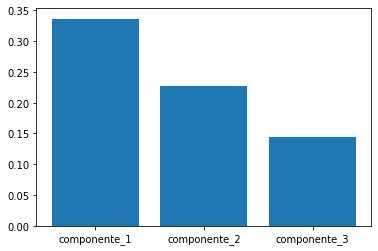

In [ ]:
PyPlot.bar(height=explicacion_vars,x=nom_cols)

Ahora, podemos sacar los gráficos de distribución y demás para ver cómo los datos se comportan bajo esta nueva dimensionalización.

<Figure size 1080x1080 with 0 Axes>

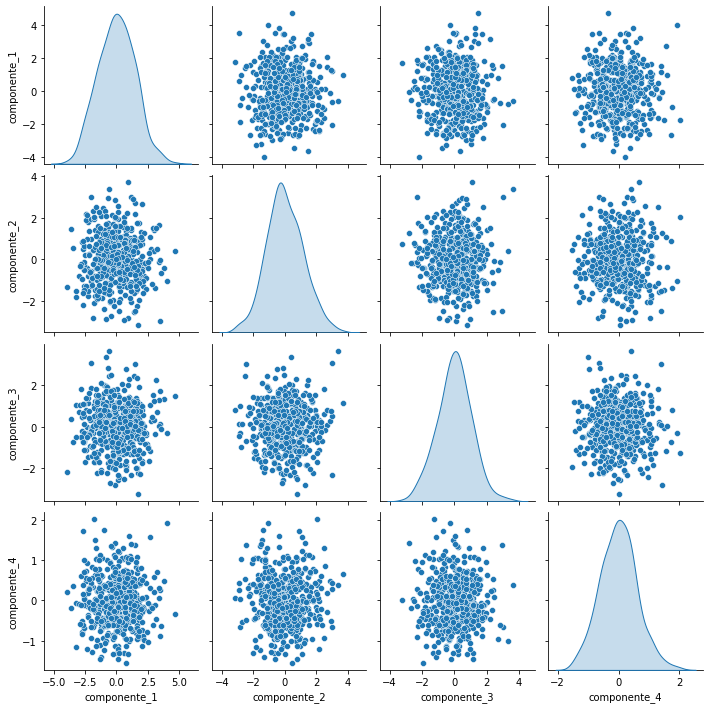

In [ ]:
plot_distribuciones(datos_pca)

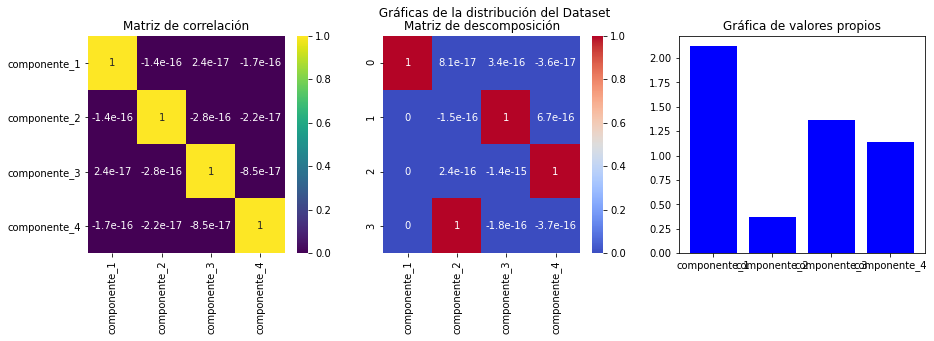

In [ ]:
graficas_descomposicionEspectral(datos_pca)

#Generando Datos para problemas de clusterización.

Con esta técnica de la normal multivariada podemos crear datos para problemas de clusterización a partir de grupos que queramos definir, sus medias y sus matrices de covarianza. 

In [ ]:
nom_grupos =['grupo_A','grupo_B','grupo_C']
tam_grupos = {'grupo_A':100,'grupo_B':200,'grupo_C':400}

Ahora, vamos a generar medidas aleatorias para cada uno de los grupos.

In [ ]:
def crearParametrosParaGrupos(grupos,dim):
  params_grupos = {}
  for nom in grupos:
    media = NumPy.random.randn(dim)
    M = NumPy.random.randn(dim,dim)
    covarianza = NumPy.dot(M,M.T)
    params_grupos[nom]={'media':media, 'cov':covarianza}
  return params_grupos

Ahora, podemos generar muestras y combinarlas en un solo Dataset. Por cada grupo tenemos que especificar qué tamaño de grupo queremos. 

In [ ]:
def crearDataset(param_grupos, tam_grupos):
  #dimension de los datos
  dim = len(param_grupos[list(param_grupos.keys())[0]]['media'])
  nom_vars = ['var_'+str(i) for i in range(1,dim+1)]
  dataframe = Pandas.DataFrame(columns=nom_vars+['grupo'])
  for grupo in param_grupos.keys():
    print("creando grupo", grupo, "tamaño",tam_grupos[grupo])
    muestra = generarMuestra(tam_grupos[grupo],param_grupos[grupo]['media'],param_grupos[grupo]['cov'],nom_vars)
    muestra['grupo'] = grupo
    dataframe = dataframe.append(muestra)
  return dataframe.sample(frac=1)



In [ ]:
data1 = crearDataset(crearParametrosParaGrupos(nom_grupos,4),tam_grupos)

Ahora, veamos cómo quedan nuestros datos en un pairplot.

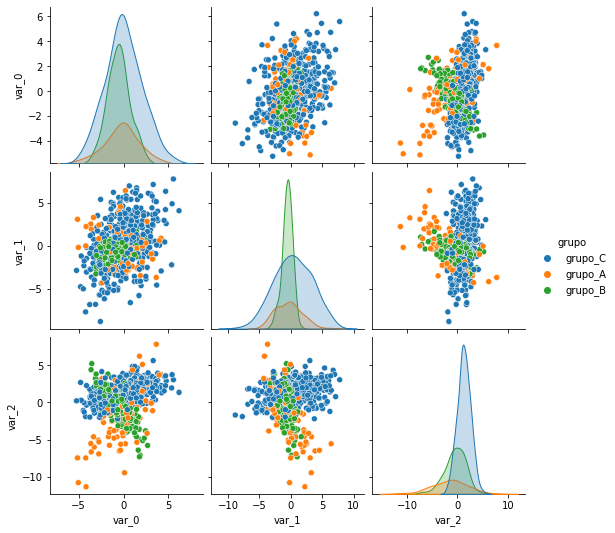

In [ ]:
SeaBorn.pairplot(data=data1,hue='grupo')

In [ ]:
param_grupos = {'grupo_1':{'media':[1,0,0],'cov':[[0.5,0.3,0],
                                                  [0,0.2,0.1],
                                                  [0.1,0,0.1]]},
                 'grupo_2':{'media':[0,4,0],'cov':[[1.5,0.3,0],
                                                   [0,0.8,0.1],
                                                   [0.1,0.3,0.8]]},
                 'grupo_3':{'media':[0,-1,6],'cov':[[0.8,0.2,0.2],
                                                   [1,0.2,0.5],
                                                   [1,1,0.8]]}}
tam_grupos = {'grupo_1':200, 'grupo_2':300,'grupo_3':200}
dataset_prueba = crearDataset(param_grupos, tam_grupos)
dataset_prueba.head()

creando grupo grupo_1 tamaño 200
creando grupo grupo_2 tamaño 300


/usr/local/lib/python3.6/dist-packages/scipy/stats/_multivariate.py:660: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


creando grupo grupo_3 tamaño 200


,var_1,var_2,var_3,grupo
197,2.027874,1.247253,0.859188,grupo_1
94,2.239615,0.861102,0.467341,grupo_1
23,-1.573873,2.433982,-0.060278,grupo_2
56,1.472772,0.588469,0.569919,grupo_1
28,0.486817,-0.041575,6.866331,grupo_3


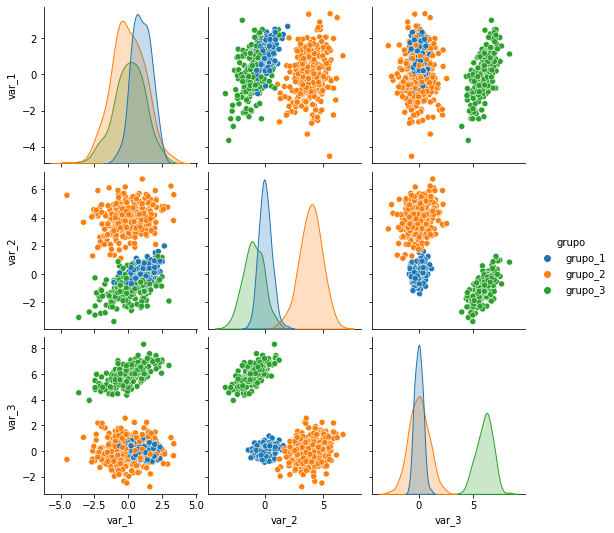

In [ ]:
SeaBorn.pairplot(data=dataset_prueba,hue='grupo')

Vamos a poenr un bloque de texto para bajar los datos como archivo de Excel.

In [ ]:
from google.colab import files
dataset_prueba.to_excel('dataset.xlsx')
files.download('dataset.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ahora, vamos a pasar esto por un algoritmo de PCA a ver cómo colapsa esto los diferentes grupos. 

In [ ]:
vars_numericas=['var_1','var_2','var_3','var_4']
var_categorica ='grupo' #en este dataset no tenemos variables categóricas
#ahora separamos las variables numéricas de las categóricas
parte_numerica = dataset_prueba[vars_numericas]
#normalizamos la parte numérica
datos_estandarizados = StandardScaler().fit_transform(parte_numerica)
parte_numerica_estandarizada = Pandas.DataFrame(data=datos_estandarizados,columns=vars_numericas)
#ahora hacemos PCA para bajar los datos a solo 2 dimensiones
dim_datos_deseada = 2
pca = PCA(n_components=dim_datos_deseada)
#ahora transformamos los datos
pca_parte_numerica = pca.fit_transform(parte_numerica_estandarizada)
#ahora transformamos estos datos en un DataFrame de nuevo
nom_cols = ['componente_'+str(i) for i in range(1,dim_datos_deseada+1)] 
datos_pca = Pandas.DataFrame(data=pca_parte_numerica,columns=nom_cols)

Ahora, podemos ver las diferentes transformaciones que le hicimos a los datos, agregando la parte categórica a ver cómo queda el asunto. 

In [ ]:
datos_estandar = parte_numerica_estandarizada.join(dataset_prueba[[var_categorica]])
pca_datos = datos_pca.join(dataset_prueba[[var_categorica]])

Ahora, podemos graficar para ver cómo el PCA afectó a los datos tanto en su versión estandarizada como en su versión reducida.

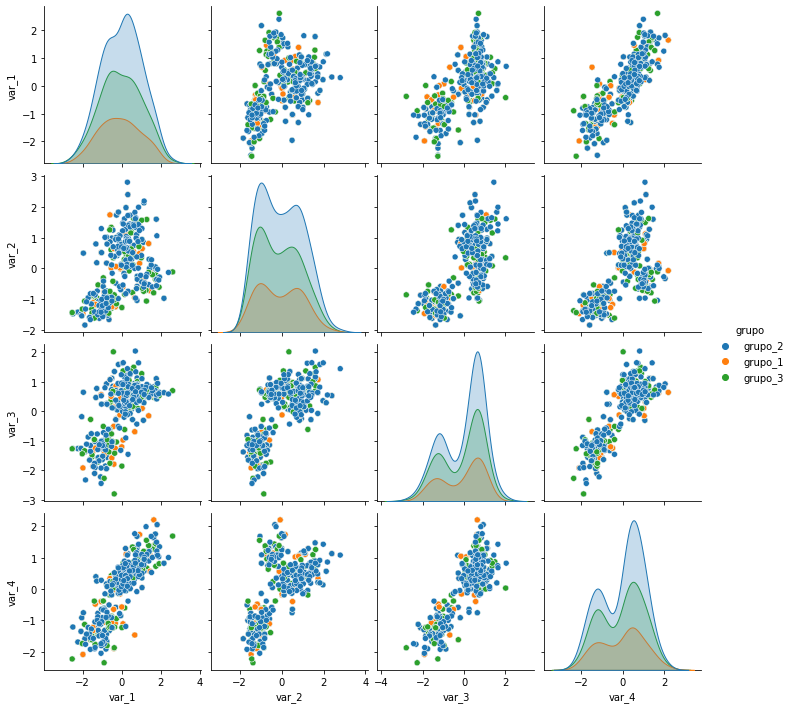

In [ ]:
SeaBorn.pairplot(datos_estandar,hue=var_categorica)

Ahora, la versión PCA de los datos

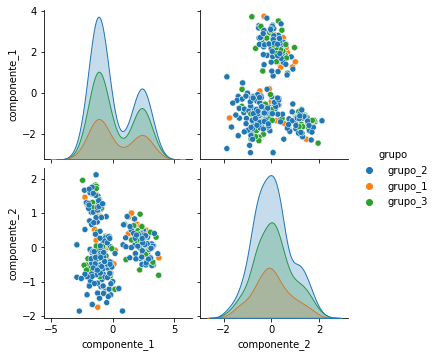

In [ ]:
SeaBorn.pairplot(pca_datos,hue=var_categorica)